In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [4]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

adam_acc=h.history['accuracy']
adam_val_acc=h.history['val_accuracy']

adam_loss=h.history['loss']
adam_val_loss=h.history['val_loss']

Epoch 1/10
657/657 [==============================] - 6s 7ms/step - loss: 0.2689 - accuracy: 0.9212 - val_loss: 0.1526 - val_accuracy: 0.9543
Epoch 2/10
657/657 [==============================] - 3s 5ms/step - loss: 0.1059 - accuracy: 0.9677 - val_loss: 0.1305 - val_accuracy: 0.9614
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0993 - val_accuracy: 0.9694
Epoch 4/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0978 - val_accuracy: 0.9714
Epoch 5/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0983 - val_accuracy: 0.9723
Epoch 6/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.1020 - val_accuracy: 0.9721
Epoch 7/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.1185 - val_accuracy: 0.9713
Epoch 

In [6]:
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

sgd_acc=h.history['accuracy']
sgd_val_acc=h.history['val_accuracy']

sgd_loss=h.history['loss']
sgd_val_loss=h.history['val_loss']

Epoch 1/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.1027 - val_accuracy: 0.9759
Epoch 2/10
657/657 [==============================] - 2s 4ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.1011 - val_accuracy: 0.9765
Epoch 3/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1000 - val_accuracy: 0.9767
Epoch 4/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0991 - val_accuracy: 0.9769
Epoch 5/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0984 - val_accuracy: 0.9771
Epoch 6/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0978 - val_accuracy: 0.9774
Epoch 7/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0974 - val_accuracy: 0.9777
Epoch 

In [7]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

rms_acc=h.history['accuracy']
rms_val_acc=h.history['val_accuracy']

rms_loss=h.history['loss']
rms_val_loss=h.history['val_loss']

Epoch 1/10
657/657 [==============================] - 4s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.1208 - val_accuracy: 0.9769
Epoch 2/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1265 - val_accuracy: 0.9781
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1258 - val_accuracy: 0.9781
Epoch 4/10
657/657 [==============================] - 3s 5ms/step - loss: 6.3556e-04 - accuracy: 0.9999 - val_loss: 0.1334 - val_accuracy: 0.9788
Epoch 5/10
657/657 [==============================] - 3s 5ms/step - loss: 3.7404e-04 - accuracy: 0.9999 - val_loss: 0.1385 - val_accuracy: 0.9783
Epoch 6/10
657/657 [==============================] - 3s 5ms/step - loss: 1.2568e-04 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9788
Epoch 7/10
657/657 [==============================] - 3s 5ms/step - loss: 3.8656e-05 - accuracy: 1.0000 - val_loss: 0.1351 - val_accurac

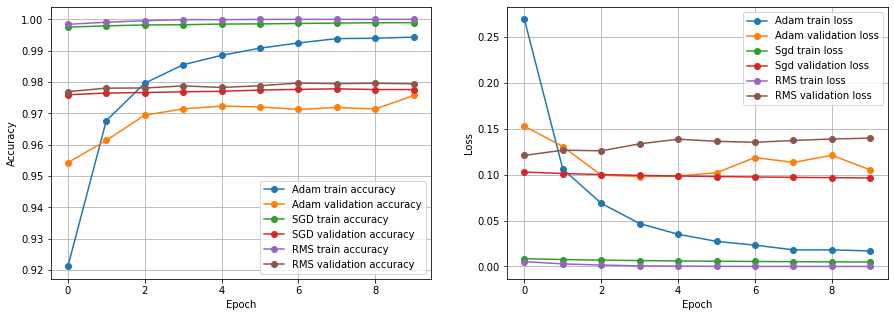

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(adam_acc, 'o-', label='Adam train accuracy')
plt.plot(adam_val_acc, 'o-', label = 'Adam validation accuracy')
plt.plot(sgd_acc, 'o-', label='SGD train accuracy')
plt.plot(sgd_val_acc, 'o-', label = 'SGD validation accuracy')
plt.plot(rms_acc, 'o-', label='RMS train accuracy')
plt.plot(rms_val_acc, 'o-', label = 'RMS validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(adam_loss, 'o-', label='Adam train loss')
plt.plot(adam_val_loss, 'o-', label='Adam validation loss')
plt.plot(sgd_loss, 'o-', label='Sgd train loss')
plt.plot(sgd_val_loss, 'o-', label='Sgd validation loss')
plt.plot(rms_loss, 'o-', label='RMS train loss')
plt.plot(rms_val_loss, 'o-', label='RMS validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')

plt.show()